## Appendix<a href="#Appendix" class="anchor-link">¶</a>

In \[31\]:

    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split,GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from matplotlib.pyplot import subplots, cm
    from ISLP.svm import plot as plot_svm
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.svm import SVC

In \[32\]:

    data=pd.read_csv('Housing.csv')

In \[33\]:

    data.head(5)

Out\[33\]:

|     | SERIAL  | DENSITY | OWNERSHP | OWNERSHPD | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | HHINCOME | VALUEH  | ... | NFAMS | NCOUPLES | PERNUM | PERWT | AGE | MARST | BIRTHYR | EDUC | EDUCD | INCTOT |
|-----|---------|---------|----------|-----------|----------|---------|----------|----------|----------|---------|-----|-------|----------|--------|-------|-----|-------|---------|------|-------|--------|
| 0   | 1371772 | 920.0   | 1        | 13        | 9990     | 9993    | 360      | 9993     | 75000    | 700000  | ... | 1     | 0        | 1      | 14    | 52  | 6     | 1969    | 7    | 71    | 75000  |
| 1   | 1371773 | 3640.9  | 2        | 22        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | ... | 2     | 0        | 1      | 83    | 22  | 6     | 1999    | 10   | 101   | 5600   |
| 2   | 1371773 | 3640.9  | 2        | 22        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | ... | 2     | 0        | 2      | 106   | 22  | 6     | 1999    | 7    | 71    | 8000   |
| 3   | 1371774 | 22.5    | 1        | 13        | 600      | 9993    | 9993     | 9993     | 7000     | 800000  | ... | 1     | 0        | 1      | 33    | 62  | 4     | 1959    | 6    | 63    | 7000   |
| 4   | 1371775 | 3710.4  | 2        | 22        | 3600     | 9993    | 9997     | 9993     | 50500    | 9999999 | ... | 1     | 0        | 1      | 297   | 50  | 3     | 1971    | 7    | 71    | 16000  |

5 rows × 24 columns

In \[34\]:

    data.columns

Out\[34\]:

    Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
           'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
           'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
           'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
          dtype='object')

In \[35\]:

    data_grouped=data.groupby("SERIAL")
    for i in data.columns:
        u=(all(data_grouped[i].nunique()==1)==True)
        

In \[36\]:

    data_grouped.head(5)

Out\[36\]:

|       | SERIAL  | DENSITY | OWNERSHP | OWNERSHPD | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | HHINCOME | VALUEH  | ... | NFAMS | NCOUPLES | PERNUM | PERWT | AGE | MARST | BIRTHYR | EDUC | EDUCD | INCTOT  |
|-------|---------|---------|----------|-----------|----------|---------|----------|----------|----------|---------|-----|-------|----------|--------|-------|-----|-------|---------|------|-------|---------|
| 0     | 1371772 | 920.0   | 1        | 13        | 9990     | 9993    | 360      | 9993     | 75000    | 700000  | ... | 1     | 0        | 1      | 14    | 52  | 6     | 1969    | 7    | 71    | 75000   |
| 1     | 1371773 | 3640.9  | 2        | 22        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | ... | 2     | 0        | 1      | 83    | 22  | 6     | 1999    | 10   | 101   | 5600    |
| 2     | 1371773 | 3640.9  | 2        | 22        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | ... | 2     | 0        | 2      | 106   | 22  | 6     | 1999    | 7    | 71    | 8000    |
| 3     | 1371774 | 22.5    | 1        | 13        | 600      | 9993    | 9993     | 9993     | 7000     | 800000  | ... | 1     | 0        | 1      | 33    | 62  | 4     | 1959    | 6    | 63    | 7000    |
| 4     | 1371775 | 3710.4  | 2        | 22        | 3600     | 9993    | 9997     | 9993     | 50500    | 9999999 | ... | 1     | 0        | 1      | 297   | 50  | 3     | 1971    | 7    | 71    | 16000   |
| ...   | ...     | ...     | ...      | ...       | ...      | ...     | ...      | ...      | ...      | ...     | ... | ...   | ...      | ...    | ...   | ... | ...   | ...     | ...  | ...   | ...     |
| 75383 | 1402573 | 2754.9  | 2        | 22        | 9990     | 7200    | 960      | 9993     | 86700    | 9999999 | ... | 1     | 2        | 1      | 229   | 30  | 1     | 1991    | 6    | 63    | 35000   |
| 75384 | 1402573 | 2754.9  | 2        | 22        | 9990     | 7200    | 960      | 9993     | 86700    | 9999999 | ... | 1     | 2        | 2      | 331   | 30  | 1     | 1991    | 6    | 64    | 50000   |
| 75385 | 1402573 | 2754.9  | 2        | 22        | 9990     | 7200    | 960      | 9993     | 86700    | 9999999 | ... | 1     | 2        | 3      | 331   | 5   | 6     | 2016    | 0    | 2     | 9999999 |
| 75386 | 1402573 | 2754.9  | 2        | 22        | 9990     | 7200    | 960      | 9993     | 86700    | 9999999 | ... | 1     | 2        | 4      | 157   | 64  | 1     | 1957    | 6    | 63    | 1700    |
| 75387 | 1402573 | 2754.9  | 2        | 22        | 9990     | 7200    | 960      | 9993     | 86700    | 9999999 | ... | 1     | 2        | 5      | 225   | 60  | 1     | 1961    | 7    | 71    | 0       |

73464 rows × 24 columns

In \[ \]:

     

In \[37\]:

    #Now we delete education,perwt,pernum,birthyr,rooms

    data.drop(columns=['ROOMS','PERWT','BIRTHYR','EDUC'],inplace=True)

In \[38\]:

    data.head(5)

Out\[38\]:

|     | SERIAL  | DENSITY | OWNERSHP | OWNERSHPD | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | HHINCOME | VALUEH  | BUILTYR2 | BEDROOMS | VEHICLES | NFAMS | NCOUPLES | PERNUM | AGE | MARST | EDUCD | INCTOT |
|-----|---------|---------|----------|-----------|----------|---------|----------|----------|----------|---------|----------|----------|----------|-------|----------|--------|-----|-------|-------|--------|
| 0   | 1371772 | 920.0   | 1        | 13        | 9990     | 9993    | 360      | 9993     | 75000    | 700000  | 7        | 4        | 2        | 1     | 0        | 1      | 52  | 6     | 71    | 75000  |
| 1   | 1371773 | 3640.9  | 2        | 22        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | 4        | 4        | 2        | 2     | 0        | 1      | 22  | 6     | 101   | 5600   |
| 2   | 1371773 | 3640.9  | 2        | 22        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | 4        | 4        | 2        | 2     | 0        | 2      | 22  | 6     | 71    | 8000   |
| 3   | 1371774 | 22.5    | 1        | 13        | 600      | 9993    | 9993     | 9993     | 7000     | 800000  | 5        | 4        | 2        | 1     | 0        | 1      | 62  | 4     | 63    | 7000   |
| 4   | 1371775 | 3710.4  | 2        | 22        | 3600     | 9993    | 9997     | 9993     | 50500    | 9999999 | 6        | 3        | 2        | 1     | 0        | 1      | 50  | 3     | 71    | 16000  |

In \[39\]:

    data.shape

Out\[39\]:

    (75388, 20)

In \[40\]:

    data.drop(columns=['OWNERSHPD','SERIAL','NFAMS','BUILTYR2'],inplace=True)

In \[41\]:

    data.head(5)

Out\[41\]:

|     | DENSITY | OWNERSHP | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | HHINCOME | VALUEH  | BEDROOMS | VEHICLES | NCOUPLES | PERNUM | AGE | MARST | EDUCD | INCTOT |
|-----|---------|----------|----------|---------|----------|----------|----------|---------|----------|----------|----------|--------|-----|-------|-------|--------|
| 0   | 920.0   | 1        | 9990     | 9993    | 360      | 9993     | 75000    | 700000  | 4        | 2        | 0        | 1      | 52  | 6     | 71    | 75000  |
| 1   | 3640.9  | 2        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | 4        | 2        | 0        | 1      | 22  | 6     | 101   | 5600   |
| 2   | 3640.9  | 2        | 1080     | 9993    | 1800     | 9993     | 13600    | 9999999 | 4        | 2        | 0        | 2      | 22  | 6     | 71    | 8000   |
| 3   | 22.5    | 1        | 600      | 9993    | 9993     | 9993     | 7000     | 800000  | 4        | 2        | 0        | 1      | 62  | 4     | 63    | 7000   |
| 4   | 3710.4  | 2        | 3600     | 9993    | 9997     | 9993     | 50500    | 9999999 | 3        | 2        | 0        | 1      | 50  | 3     | 71    | 16000  |

In \[42\]:

    data.shape

Out\[42\]:

    (75388, 16)

In \[43\]:

    data.drop(columns=['PERNUM','NCOUPLES','EDUCD','HHINCOME'],inplace=True)

In \[44\]:

    data.head(5)

Out\[44\]:

|     | DENSITY | OWNERSHP | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | VALUEH  | BEDROOMS | VEHICLES | AGE | MARST | INCTOT |
|-----|---------|----------|----------|---------|----------|----------|---------|----------|----------|-----|-------|--------|
| 0   | 920.0   | 1        | 9990     | 9993    | 360      | 9993     | 700000  | 4        | 2        | 52  | 6     | 75000  |
| 1   | 3640.9  | 2        | 1080     | 9993    | 1800     | 9993     | 9999999 | 4        | 2        | 22  | 6     | 5600   |
| 2   | 3640.9  | 2        | 1080     | 9993    | 1800     | 9993     | 9999999 | 4        | 2        | 22  | 6     | 8000   |
| 3   | 22.5    | 1        | 600      | 9993    | 9993     | 9993     | 800000  | 4        | 2        | 62  | 4     | 7000   |
| 4   | 3710.4  | 2        | 3600     | 9993    | 9997     | 9993     | 9999999 | 3        | 2        | 50  | 3     | 16000  |

In \[45\]:

    data.shape

Out\[45\]:

    (75388, 12)

In \[46\]:

    for i in data.columns:
        u=data[i].unique()
        print(f"{i}:{u} \n\n")

    DENSITY:[  920.   3640.9    22.5  3710.4   448.2   155.4  5962.1   230.4   362.4
        96.8  4031.9  4084.5   150.3   765.8  5339.8  3919.8   132.1  2156.8
      4291.1    66.2   473.8  3558.4  2754.9   665.1   237.8  4071.2 13284.6
      1758.5   222.9  8710.1   667.7  1927.8  8944.    779.2  4501.4  1411.3
      2543.5  3376.5  3248.8  4560.6  1366.5  8784.4  2425.1   548.4  2746.3
      3843.3  2295.9   217.4  1667.9  4677.1  2493.3   529.2  1607.   2288.1
      4161.6   280.3] 


    OWNERSHP:[1 2] 


    COSTELEC:[9990 1080  600 3600 1560 1800  840 9997 1440 3360 9993 1920 2040 2400
      960 1200 2160 4200  480 1320 3120 2280 3960  360 3840 3000  120 1680
      240 5040  720 2640 4560 3480 2520 2880 4680 4800 2760 5160 4320 5760
     4920 3240 5640 3720 4080 6000   48 5280 5400 4440 5520 6600 6360 6480
     5880 6240 6120] 


    COSTGAS:[9993 3000  480  120 9992 1440  360 9997  240  960  600 1800 1200  840
      720   48 4200 1080 1320 1560 1680 3600 2520 2040 7200 1920 2640 2400
     3360 2760 2160 3240 2280 3720 3480 2880 3120 4080 3960 3840] 


    COSTWATR:[ 360 1800 9993 9997 1500  120 1600   50 1900 1700 1400 5000  110  600
     1100  780  190  100  210  720 1000   40  240 2000 2200  270 2300  180
      540 2600  940   80  750 1200 3600  850 3900  150  960   90  200  900
     2400  500   30 3000  870  400  660  380 3300  800  230 1300  480  830
      570  700   70  260  770  320   60   20 2100  300  420  250  890 2700
     2900  860  130  450  740  340  280  160  950  980  650  790  140  170
      590  330  680  560  840  460 2500  970  440  620 3400  310  920  220
      630  810 3700  350  610 3200  640  550  290  490  580   10  910  880
      390  990 3100  430 3500  710  760  930 2800  470  690  530  510 3800
      410  820  370  670    4  520  730] 


    COSTFUEL:[9993  700  800  500   50  200 1200  780  600 9997 1000  300 1500 2000
     3300  360 1400  150  610  130   40  400  100 1800   30 1100  180   20
     1300  750  250  540  220   60    4  850  240  120 2100  550  350  140
      450   70  260 1600  560  940  900 1900  190  210  280   80 2300  650
      530   90  320  110  430  380  480  680  230 2200  980 1700   10  890
      290  660  410  340  930  470  830  840  590  640  720  160  460  770
      520  960  860  790  910  390  970  440  580  270  330  740  630  870
      950  310  730  760  570  420  880  820  690  990  670] 


    VALUEH:[ 700000 9999999  800000  850000  180000  500000   15000  450000 5279000
      375000  370000  290000  650000  140000  487000  475000 1900000 1100000
      550000  950000  200000  285000  187000  240000  750000   60000  220000
       90000 2300000  250000  330000  975000  600000  360000  485000 1500000
      400000  900000  300000  425000  380000  760000  280000   36000  525000
      275000  511000  405000  630000 1200000 1169000  584000  230000  175000
     1080000  170000    1800  340000  145000  490000  350000   45000 1300000
     1000000  325000   25000  110000   61000  580000  495000  571000  735000
      730000  150000 2750000  298000  888000  940000  699000 2400000   33600
     1600000  225000  585000  620000  385000   35000  530000  435000  545000
      335000  103000  847000  680000  639000  597000   20000  259000  448000
      640000  210000  644000  830000  120000  725000  875000  460000    1200
      265000 1136000  195000  100000  424000  470000   40000  262000  313000
      320000  255000  920000  999000  190000   50000  430000  160000   56000
      125000  410000  128000  480000  925000  349000   84000  590000  695000
      130000   76000  867000  660000  510000  484000   55000  706000  690000
      146000  408000  356000 1850000  670000   18900  270000 1049000 1250000
      727000 1050000    2000 1241000    6000  675000 2046000  196000  167000
     2500000  520000  420000 1350000   75000  540000  575000  377000  710000
      989000  310000  135000  347000 1160000  763000  658000  505000  772000
     1800000    6500  302000 1400000   95000  498000  986000  415000  816000
      315000  985000  465000  970000  295000   80000   18800  625000   10000
      432000  489000    2200  343000  570000  560000 2000000    3000  395000
      579000  363000 2200000  419000  379000  454000  960000  565000  282000
        1000    5000 1750000  780000  278000   34600  440000  397000  345000
      319000  260000  508000  411000    8000   89000  376000  286000   12000
      825000   83000    1600  615000  455000  214000  382000  299000  870000
      715000 1700000  623000  775000   85000    4000  592000   30000 1069000
      885000  179000  305000  645000  835000 2150000   37500  499000   52000
      522000   68000  712000  655000  452000 1173000  514000 1147000  572000
      365000 1332000  185000  304000  149000    3500  895000  390000 2700000
     1395000   87000  114000  685000  990000  567000  109000   70000  289000
      596000   54000  820000  526000 2980000  805000  605000  353000  439000
      138000  387000  912000  155000  199000  720000  258000  105000   47500
      980000    1900   13000  215000  724000  897000  795000  412000   77000
      790000    2500  603000  336000  189000 1178000  467000  445000  307000
     2993000 1450000  355000  610000  890000  119000  173000  873000  324000
      272000  102000  935000  860000  326000 1280000  314000  253000 1110000
      209000  444000   47000 1150000   73000  840000  242000   24000  503000
     1175000  388000  589000  679000  672000 1027000 1074000  303000  515000
     2259000  389000   65000  391000   14000  930000  368000  538000  399000
       23500  115000  386000 2600000  168000  129000  613000  740000  234000
      249000 1418000  535000  578000  582000  554000  401000  965000 1036000
      944000  366000 1650000 1227000  205000   67000 2119000  264000    4700
       86000  381000  165000  865000  358000  223000  426000  416000  629000
       78000  635000  863000  821000  880000 1205000  266000  174000  770000
      765000   51000  843000   46000  101000  482000  901000  464000   24500
      755000   27500  955000  235000  799000  413000  705000  719000  178000
      785000  810000 1301000  318000  427000 2800000  534000 1125000    2300
     1380000   38000  704000  716000  531000  256000  627000  348000  486000
      148000  213000  311000  665000  217000   27000  246000  341000   22500
      922000  907000  717000  595000  147000  333000   43000 1061000 2001000
      402000 1010000  346000  418000 1550000  739000  915000  647000  245000
      338000  383000  434000  555000  552000  429000  203000  744000  291000
       36400  732000   53000 1471000 2100000  681000 1075000  398000  153000
      899000  218000  974000  296000   21000  212000  446000  151000  274000
      653000 1030000  687000  648000  247000  551000  491000  306000  512000
      457000 1047000  878000   98000  417000  497000  396000  469000  339000
      236000  132000  449000  271000  372000  723000  354000 1171000  378000
     1290000  902000  124000   17000  477000  316000 1636000  521000  374000
      441000  995000  263000   17500   30500  959000  232000  563000  351000
     1426000   35700  754000  607000   40300  407000  618000  488000  228000
      532000   18000  294000  447000  239000  561000   58000   29700  657000
      651000  193000  972000  293000  868000    1100   23000    7000 1093000
       39700  422000  198000  726000  227000 1520000    1300    1400  621000
        1700   57000   22000   33000    9000  659000  112000 1001000  769000
     1070000 1115000   31200  371000 1625000    2400 1225000  158000  787000
     1537000  786000  778000 1325000  807000   79000  453000  861000  164000
      276000   34000 1690000  188000   93000 1360000  301000  176000  667000
     1055000  745000 1525000   22600  954000 1445000  357000    4200  352000
      539000   69000  917000   88000  906000  804000 2430000  911000  929000
       49500   32500  788000  562000   59000  471000 2900000 1088000  139000
      362000   11900  442000  634000   82000  473000  287000 1159000   97000
       26900 1675000  666000  204000   21500  777000  463000  815000  364000
       28000  856000   16500  237000  182000 1099000   64000  628000 1246000
      292000  656000 1112000  553000  747000  502000  251000  609000  393000
       48000  599000  331000  479000   16000   34900  284000  329000 1328000
      953000  359000  269000 1486000  496000  854000  641000  749000  612000
      506000  586000   26000  673000  564000  927000  116000 1320000  421000
      267000  478000 1434000  436000   48500  668000  474000  782000    2800
     2250000 1310000  309000  664000  803000 1950000  222000 1124000  984000
        2600  583000  604000  156000   32000  809000 1857000  219000   29600
       38400 1135000    1500  701000  404000   42500 1091000 1035000 2153000
      361000 1260000  194000  945000    6100  577000  268000  317000  117000
      824000  136000  993000 1145000 1462000  323000  461000  373000  751000
      279000 1134000 1420000  569000    2900  113000  529000  321000   74000
      186000  949000  169000  759000  516000  859000  121000  312000  493000
      443000  466000  548000  206000  674000  933000  845000  855000 1060000
      431000  822000  998000  958000] 


    BEDROOMS:[4 3 5 1 6 8 2] 


    VEHICLES:[2 3 1 9 4 5 6] 


    AGE:[52 22 62 50 18 80 93 61 24 16  0 45 65 26 23 74 40 32  9  3 39  4 33 37
     41 11  8 28 36  2 71 67 58 31 14 73 13 10 81 79 46 12  5 53 21 51 56 63
     60 47 43 17 44 49 87 48 77 59 27 25  6 34 35 19 72 76 29 57 42 78 75 66
     64 68 55 70  7 38 88 54 20 83 30 84 15 69 82  1 85 86 89] 


    MARST:[6 4 3 1 5 2] 


    INCTOT:[ 75000   5600   8000 ... 272700 408000   2810] 

In \[47\]:

    data.shape

Out\[47\]:

    (75388, 12)

In \[48\]:

    data.columns

Out\[48\]:

    Index(['DENSITY', 'OWNERSHP', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL',
           'VALUEH', 'BEDROOMS', 'VEHICLES', 'AGE', 'MARST', 'INCTOT'],
          dtype='object')

In \[49\]:

    ag_cols={'INCTOT':'mean','AGE':'max'}
    df=data.groupby(['DENSITY', 'OWNERSHP', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL',
            'VALUEH', 'BEDROOMS', 'VEHICLES', 'MARST']).agg(ag_cols)

In \[50\]:

    df.reset_index(inplace=True)

In \[51\]:

    df.shape

Out\[51\]:

    (43319, 12)

In \[52\]:

    df

Out\[52\]:

|       | DENSITY | OWNERSHP | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | VALUEH  | BEDROOMS | VEHICLES | MARST | INCTOT    | AGE |
|-------|---------|----------|----------|---------|----------|----------|---------|----------|----------|-------|-----------|-----|
| 0     | 22.5    | 1        | 240      | 360     | 1200     | 9993     | 550000  | 4        | 3        | 5     | 128000.0  | 50  |
| 1     | 22.5    | 1        | 240      | 1800    | 9993     | 9993     | 200000  | 1        | 1        | 4     | 0.0       | 59  |
| 2     | 22.5    | 1        | 360      | 840     | 120      | 9993     | 200000  | 4        | 2        | 1     | 41850.0   | 79  |
| 3     | 22.5    | 1        | 360      | 1200    | 300      | 9993     | 240000  | 5        | 3        | 1     | 32400.0   | 71  |
| 4     | 22.5    | 1        | 360      | 1440    | 1200     | 9993     | 532000  | 4        | 1        | 5     | 3600.0    | 81  |
| ...   | ...     | ...      | ...      | ...     | ...      | ...      | ...     | ...      | ...      | ...   | ...       | ... |
| 43314 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 2        | 9        | 6     | 25750.0   | 36  |
| 43315 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 3        | 1        | 1     | 106200.0  | 53  |
| 43316 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 3        | 1        | 6     | 9999999.0 | 14  |
| 43317 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 4        | 9        | 6     | 38800.0   | 34  |
| 43318 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9997     | 9999999 | 3        | 2        | 1     | 57500.0   | 27  |

43319 rows × 12 columns

In \[53\]:

    df['VEHICLES']=df['VEHICLES'].apply(lambda x: 0 if x == 9 else x)
    df['Married'], df['Divorced'], df['NotMarried'] = (df['MARST'].isin([1, 2])).astype(int), (df['MARST'].isin([3, 4, 5])).astype(int), (df['MARST'] == 6).astype(int)
    df['COSTELEC_N']=df['COSTELEC'].apply(lambda x: 0 if x > 9992 else x)
    df['COSTGAS_N']=df['COSTGAS'].apply(lambda x: 0 if x > 9992 else x)
    df['COSTWATR_N']=df['COSTWATR'].apply(lambda x: 0 if x > 9992 else x)
    df['COSTFUEL_N']=df['COSTFUEL'].apply(lambda x: 0 if x > 9992 else x)

In \[ \]:

     

In \[54\]:

    df

Out\[54\]:

|       | DENSITY | OWNERSHP | COSTELEC | COSTGAS | COSTWATR | COSTFUEL | VALUEH  | BEDROOMS | VEHICLES | MARST | INCTOT    | AGE | Married | Divorced | NotMarried | COSTELEC_N | COSTGAS_N | COSTWATR_N | COSTFUEL_N |
|-------|---------|----------|----------|---------|----------|----------|---------|----------|----------|-------|-----------|-----|---------|----------|------------|------------|-----------|------------|------------|
| 0     | 22.5    | 1        | 240      | 360     | 1200     | 9993     | 550000  | 4        | 3        | 5     | 128000.0  | 50  | 0       | 1        | 0          | 240        | 360       | 1200       | 0          |
| 1     | 22.5    | 1        | 240      | 1800    | 9993     | 9993     | 200000  | 1        | 1        | 4     | 0.0       | 59  | 0       | 1        | 0          | 240        | 1800      | 0          | 0          |
| 2     | 22.5    | 1        | 360      | 840     | 120      | 9993     | 200000  | 4        | 2        | 1     | 41850.0   | 79  | 1       | 0        | 0          | 360        | 840       | 120        | 0          |
| 3     | 22.5    | 1        | 360      | 1200    | 300      | 9993     | 240000  | 5        | 3        | 1     | 32400.0   | 71  | 1       | 0        | 0          | 360        | 1200      | 300        | 0          |
| 4     | 22.5    | 1        | 360      | 1440    | 1200     | 9993     | 532000  | 4        | 1        | 5     | 3600.0    | 81  | 0       | 1        | 0          | 360        | 1440      | 1200       | 0          |
| ...   | ...     | ...      | ...      | ...     | ...      | ...      | ...     | ...      | ...      | ...   | ...       | ... | ...     | ...      | ...        | ...        | ...       | ...        | ...        |
| 43314 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 2        | 0        | 6     | 25750.0   | 36  | 0       | 0        | 1          | 0          | 0         | 0          | 0          |
| 43315 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 3        | 1        | 1     | 106200.0  | 53  | 1       | 0        | 0          | 0          | 0         | 0          | 0          |
| 43316 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 3        | 1        | 6     | 9999999.0 | 14  | 0       | 0        | 1          | 0          | 0         | 0          | 0          |
| 43317 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9993     | 9999999 | 4        | 0        | 6     | 38800.0   | 34  | 0       | 0        | 1          | 0          | 0         | 0          | 0          |
| 43318 | 13284.6 | 2        | 9997     | 9997    | 9997     | 9997     | 9999999 | 3        | 2        | 1     | 57500.0   | 27  | 1       | 0        | 0          | 0          | 0         | 0          | 0          |

43319 rows × 19 columns

In \[55\]:

    df.drop(columns=['MARST','COSTELEC','COSTGAS','COSTWATR','COSTFUEL'],inplace=True)

In \[56\]:

    df

Out\[56\]:

|       | DENSITY | OWNERSHP | VALUEH  | BEDROOMS | VEHICLES | INCTOT    | AGE | Married | Divorced | NotMarried | COSTELEC_N | COSTGAS_N | COSTWATR_N | COSTFUEL_N |
|-------|---------|----------|---------|----------|----------|-----------|-----|---------|----------|------------|------------|-----------|------------|------------|
| 0     | 22.5    | 1        | 550000  | 4        | 3        | 128000.0  | 50  | 0       | 1        | 0          | 240        | 360       | 1200       | 0          |
| 1     | 22.5    | 1        | 200000  | 1        | 1        | 0.0       | 59  | 0       | 1        | 0          | 240        | 1800      | 0          | 0          |
| 2     | 22.5    | 1        | 200000  | 4        | 2        | 41850.0   | 79  | 1       | 0        | 0          | 360        | 840       | 120        | 0          |
| 3     | 22.5    | 1        | 240000  | 5        | 3        | 32400.0   | 71  | 1       | 0        | 0          | 360        | 1200      | 300        | 0          |
| 4     | 22.5    | 1        | 532000  | 4        | 1        | 3600.0    | 81  | 0       | 1        | 0          | 360        | 1440      | 1200       | 0          |
| ...   | ...     | ...      | ...     | ...      | ...      | ...       | ... | ...     | ...      | ...        | ...        | ...       | ...        | ...        |
| 43314 | 13284.6 | 2        | 9999999 | 2        | 0        | 25750.0   | 36  | 0       | 0        | 1          | 0          | 0         | 0          | 0          |
| 43315 | 13284.6 | 2        | 9999999 | 3        | 1        | 106200.0  | 53  | 1       | 0        | 0          | 0          | 0         | 0          | 0          |
| 43316 | 13284.6 | 2        | 9999999 | 3        | 1        | 9999999.0 | 14  | 0       | 0        | 1          | 0          | 0         | 0          | 0          |
| 43317 | 13284.6 | 2        | 9999999 | 4        | 0        | 38800.0   | 34  | 0       | 0        | 1          | 0          | 0         | 0          | 0          |
| 43318 | 13284.6 | 2        | 9999999 | 3        | 2        | 57500.0   | 27  | 1       | 0        | 0          | 0          | 0         | 0          | 0          |

43319 rows × 14 columns

In \[57\]:

    df.columns

Out\[57\]:

    Index(['DENSITY', 'OWNERSHP', 'VALUEH', 'BEDROOMS', 'VEHICLES', 'INCTOT',
           'AGE', 'Married', 'Divorced', 'NotMarried', 'COSTELEC_N', 'COSTGAS_N',
           'COSTWATR_N', 'COSTFUEL_N'],
          dtype='object')

# Splitting Dataset<a href="#Splitting-Dataset" class="anchor-link">¶</a>

In \[71\]:

    selected=['OWNERSHP', 'BEDROOMS', 'AGE','VEHICLES',
           'Married', 'Divorced', 'NotMarried', 'COSTELEC_N', 'COSTGAS_N',
           'COSTWATR_N', 'COSTFUEL_N']
    x=df[selected[1:]]

    y=df['OWNERSHP']

In \[65\]:

    X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

    scaling=MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train=scaling.transform(X_train)
    X_test=scaling.transform(X_test)

## SVM:Linear Model<a href="#SVM:Linear-Model" class="anchor-link">¶</a>

In \[67\]:

    grid_params = {'C': [0.001, 0.01, 0.1, 1,  10, 100]}
    svcfit = SVC(kernel='linear')
    tune_l = GridSearchCV(svcfit, grid_params, cv=5)
    tune_l.fit(X_train, y_train)
    print('Best Parameters: ', tune_l.best_params_)
    print('Cross validation error rate lowest: {:.2f}%'.format(1 - tune_l.best_score_))

    Best Parameters:  {'C': 100}
    Cross validation error rate lowest: 0.18%

In \[68\]:

    tune_l.cv_results_[('mean_test_score')]

Out\[68\]:

    array([0.73551429, 0.81832283, 0.82073036, 0.82096118, 0.82102714,
           0.82106012])

In \[69\]:

    svc_l = SVC(kernel='linear', C=tune_l.best_params_['C'], cache_size=10000, random_state=42, max_iter=20000)
    svc_l.fit(X_train[:,0:2], y_train)

    C:\Users\divya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
      warnings.warn(

Out\[69\]:

    SVC(C=100, cache_size=10000, kernel='linear', max_iter=20000, random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(C=100, cache_size=10000, kernel='linear', max_iter=20000, random_state=42)

In \[72\]:

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    h = 0.02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc_l.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel(selected[1])
    plt.ylabel(selected[2])
    plt.title('Decision Boundary for First Two Important Features')
    plt.show()

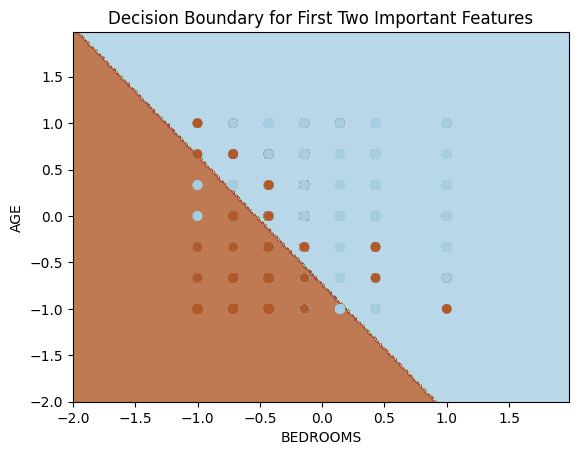

In \[73\]:

    y_pred= tune_l.predict(X_test)
    confusion_mat=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix (Testing):\n',confusion_mat)
    print('Test Error',np.mean(y_pred != y_test))
    print('Test Accuracy',np.mean(y_pred == y_test))

    y_pred_train = tune_l.predict(X_train)
    confusion_mat_train = confusion_matrix(y_train, y_pred_train)
    print('Confusion Matrix (Training):\n', confusion_mat_train)
    train_error = np.mean(y_pred_train != y_train)
    print('Training Error:', train_error)
    train_accuracy = np.mean(y_pred_train == y_train)
    print('Training Accuracy:', train_accuracy)

    Confusion Matrix (Testing):
     [[9067  434]
     [1854 1641]]
    Test Error 0.17605417051400432
    Test Accuracy 0.8239458294859957
    Confusion Matrix (Training):
     [[21085  1162]
     [ 4253  3823]]
    Training Error: 0.17857731754773604
    Training Accuracy: 0.8214226824522639

## SVM Radial<a href="#SVM-Radial" class="anchor-link">¶</a>

In \[74\]:

    grid_params = {'C': [0.001, 0.01, 0.1, 1,  10, 100],'gamma':[2,4,5]}
    svcfit = SVC(kernel='rbf')
    tune_r = GridSearchCV(svcfit, grid_params, cv=5)
    tune_r.fit(X_train, y_train)
    print('Best Parameters: ', tune_r.best_params_)
    print('Cross validation error rate lowest: {:.2f}%'.format(1 - tune_r.best_score_))

    Best Parameters:  {'C': 1, 'gamma': 5}
    Cross validation error rate lowest: 0.17%

In \[75\]:

    tune_r.cv_results_[('mean_test_score')]

Out\[75\]:

    array([0.73366751, 0.73366751, 0.73366751, 0.80625285, 0.798371  ,
           0.7929955 , 0.82577606, 0.82491861, 0.82429201, 0.83088769,
           0.83207491, 0.8322068 , 0.82976642, 0.82445673, 0.82303867,
           0.81997166, 0.80790164, 0.80457076])

In \[76\]:

    svc_r = SVC(kernel='rbf', C=tune_r.best_params_['C'], cache_size=10000, random_state=42, max_iter=15000)

    svc_r.fit(X_train[:,0:2], y_train)

Out\[76\]:

    SVC(C=1, cache_size=10000, max_iter=15000, random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(C=1, cache_size=10000, max_iter=15000, random_state=42)

In \[77\]:

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    h = 0.02 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc_r.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel(selected[1])
    plt.ylabel(selected[2])
    plt.title('Decision Boundary for First Two Important Features')
    plt.show()

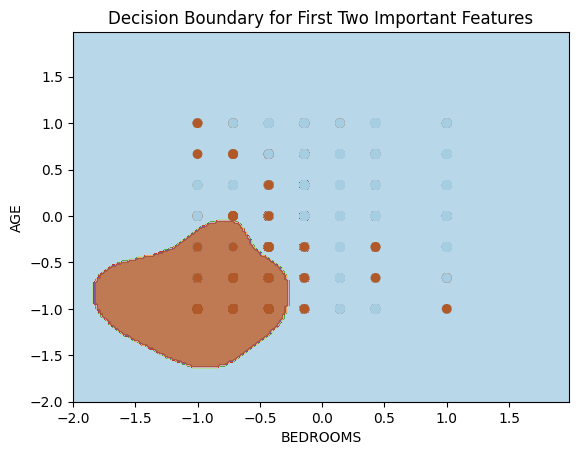

In \[78\]:

    y_pred= tune_r.predict(X_test)
    confusion_mat=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix (Testing):\n',confusion_mat)
    print('Test Error',np.mean(y_pred != y_test))
    print('Test Accuracy',np.mean(y_pred == y_test))

    y_pred_train = tune_r.predict(X_train)
    confusion_mat_train = confusion_matrix(y_train, y_pred_train)
    print('Confusion Matrix (Training):\n', confusion_mat_train)
    train_error = np.mean(y_pred_train != y_train)
    print('Training Error:', train_error)
    train_accuracy = np.mean(y_pred_train == y_train)
    print('Training Accuracy:', train_accuracy)

    Confusion Matrix (Testing):
     [[9012  489]
     [1644 1851]]
    Test Error 0.16412742382271467
    Test Accuracy 0.8358725761772853
    Confusion Matrix (Training):
     [[21117  1130]
     [ 3513  4563]]
    Training Error: 0.1531180951752795
    Training Accuracy: 0.8468819048247205

## SVM: Polynomial<a href="#SVM:-Polynomial" class="anchor-link">¶</a>

In \[79\]:

    grid_params = {'C': [0.001, 0.01, 0.1, 1,  10, 100],'degree':[1,2,3,4,5]}
    svcfit = SVC(kernel='poly')
    tune_p = GridSearchCV(svcfit, grid_params, cv=5)
    tune_p.fit(X_train, y_train)
    print('Best Parameters: ', tune_p.best_params_)
    print('Cross validation error rate lowest: {:.2f}%'.format(1 - tune_p.best_score_))

    Best Parameters:  {'C': 100, 'degree': 5}
    Cross validation error rate lowest: 0.17%

In \[80\]:

    tune_p.cv_results_[('mean_test_score')]

Out\[80\]:

    array([0.73366751, 0.73366751, 0.77208714, 0.79253372, 0.80216339,
           0.79926125, 0.81208986, 0.813442  , 0.81706968, 0.81918025,
           0.82046649, 0.82300581, 0.82231326, 0.82353338, 0.82511634,
           0.82092821, 0.82478664, 0.82547918, 0.8267983 , 0.82861208,
           0.82106011, 0.82462174, 0.82630363, 0.82966742, 0.8309536 ,
           0.82106012, 0.82498452, 0.82623767, 0.8311844 , 0.83293225])

In \[81\]:

    svc_p = SVC(kernel='poly', C=tune_p.best_params_['C'], cache_size=10000, random_state=42, max_iter=15000)
    svc_p.fit(X_train[:,0:2], y_train)

    C:\Users\divya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
      warnings.warn(

Out\[81\]:

    SVC(C=100, cache_size=10000, kernel='poly', max_iter=15000, random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(C=100, cache_size=10000, kernel='poly', max_iter=15000, random_state=42)

In \[82\]:

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    h = 0.02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc_p.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel(selected[1])
    plt.ylabel(selected[2])
    plt.title('Decision Boundary for First Two Important Features')
    plt.show()

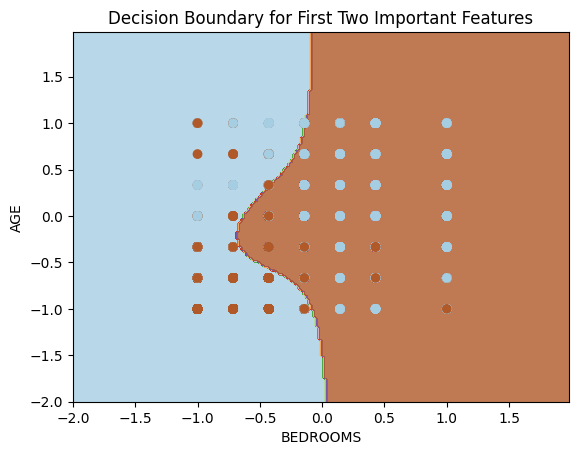

In \[83\]:

    y_pred= tune_p.predict(X_test)
    confusion_mat=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix (Testing):\n',confusion_mat)
    print('Test Error',np.mean(y_pred != y_test))
    print('Test Accuracy',np.mean(y_pred == y_test))

    y_pred_train = tune_p.predict(X_train)
    confusion_mat_train = confusion_matrix(y_train, y_pred_train)
    print('Confusion Matrix (Training):\n', confusion_mat_train)
    train_error = np.mean(y_pred_train != y_train)
    print('Training Error:', train_error)
    train_accuracy = np.mean(y_pred_train == y_train)
    print('Training Accuracy:', train_accuracy)

    Confusion Matrix (Testing):
     [[9096  405]
     [1723 1772]]
    Test Error 0.16374269005847952
    Test Accuracy 0.8362573099415205
    Confusion Matrix (Training):
     [[21251   996]
     [ 3846  4230]]
    Training Error: 0.15968077037232464
    Training Accuracy: 0.8403192296276754

In \[ \]: